![Airbnb logo](https://japanesquest.com/wp-content/uploads/2017/10/airbnb-logo.png)

In [1]:
# To-do List
# 18.1.1.FeatureEngineering and 18.2.1.FeatureEngineering
# SVR (linear) 

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.metrics import mean_squared_error

In [2]:
clean_sum_listings = pd.read_csv('clean_sum_listings.csv')

In [3]:
clean_sum_listings.columns

Index(['Unnamed: 0', 'name', 'host_id', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

### 1. Feature Engineering 

In [143]:
# Since multiple variables reveal highly skewed distributions, a log transformation is applied to fix them
# A log transformation and removal of outliers makes the distribution look much closer to normal

In [5]:
clean_sum_listings['price'] = np.log1p(clean_sum_listings['price'])
clean_sum_listings['number_of_reviews'] = np.log1p(clean_sum_listings['number_of_reviews'])
clean_sum_listings['minimum_nights']= np.log1p(clean_sum_listings['minimum_nights'])
clean_sum_listings = clean_sum_listings.drop(['Unnamed: 0', 'host_id', 'name'], axis=1)

### 2. Encoding Features

### 2.1 Encoding Categorical Features

In [144]:
categorical_features = clean_sum_listings.select_dtypes(include=['object'])
print('Categorical features: {}'.format(categorical_features.shape))

Categorical features: (15753, 3)


In [145]:
categorical_features_one_hot = pd.get_dummies(categorical_features)
categorical_features_one_hot.head()

,neighbourhood_group_Ciutat Vella,neighbourhood_group_Eixample,neighbourhood_group_Gràcia,neighbourhood_group_Horta-Guinardó,neighbourhood_group_Les Corts,neighbourhood_group_Nou Barris,neighbourhood_group_Sant Andreu,neighbourhood_group_Sant Martí,neighbourhood_group_Sants-Montjuïc,neighbourhood_group_Sarrià-Sant Gervasi,...,neighbourhood_la Verneda i la Pau,neighbourhood_la Vila Olímpica del Poblenou,neighbourhood_la Vila de Gràcia,neighbourhood_les Corts,neighbourhood_les Roquetes,neighbourhood_les Tres Torres,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### 2.2 Encoding Numerical Features

In [9]:
numerical_features =  clean_sum_listings.select_dtypes(exclude=['object'])
y = numerical_features.price
numerical_features = numerical_features.drop(['price'], axis=1)
print('Numerical features: {}'.format(numerical_features.shape))

Numerical features: (15753, 7)


In [150]:
X = np.concatenate((numerical_features, categorical_features_one_hot), axis=1)
X_df = pd.concat([numerical_features, categorical_features_one_hot], axis=1)

In [151]:
data = pd.concat([X_df, y], axis = 1)

In [152]:
data.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Ciutat Vella,neighbourhood_group_Eixample,neighbourhood_group_Gràcia,...,neighbourhood_la Vila Olímpica del Poblenou,neighbourhood_la Vila de Gràcia,neighbourhood_les Corts,neighbourhood_les Roquetes,neighbourhood_les Tres Torres,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,price
0,41.38077,2.17551,1.386294,1.098612,0.05,3,90,1,0,0,...,0,0,0,0,0,0,0,1,0,4.110874
1,41.40928,2.16112,0.693147,4.553877,0.83,29,331,0,0,1,...,0,0,0,0,0,1,0,0,0,4.204693
2,41.40566,2.17015,1.098612,4.158883,0.59,6,329,0,0,1,...,0,0,0,0,0,1,0,0,0,4.948760
3,41.37916,2.17535,1.791759,2.197225,0.07,3,180,1,0,0,...,0,0,0,0,0,0,0,1,0,4.615121
4,41.37906,2.19141,1.098612,4.304065,0.70,1,352,1,0,0,...,0,0,0,0,0,0,0,1,0,3.526361


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [158]:
print('Shape of the X_train: {}'.format(X_train.shape))
print('Shape of the y_train: {}'.format(y_train.shape))
print('Shape of the X_test: {}'.format(X_test.shape))
print('Shape of the y_test: {}'.format(y_test.shape))

Shape of the X_train: (11027, 91)
Shape of the y_train: (11027,)
Shape of the X_test: (4726, 91)
Shape of the y_test: (4726,)


### 3. Rescalling the data

In [159]:
# Robust Scaler - the centering and scaling statistics of this scaler are based on percentiles and are 
# therefore not influenced by a few number of very large marginal outliers.

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### 4. Machine Learning Models

### 4.1 Cross-Validation

In [161]:
# evaluating the score of multiple models based on K-fold cross-validation 
# Split dataset into 5 consecutive folds  

from sklearn.model_selection import KFold, cross_val_score

n_folds = 5

def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state = 42).get_n_splits(numerical_features)
    return cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)

In [160]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression, ElasticNet,  HuberRegressor
from xgboost import XGBRegressor

for Model in [LinearRegression, Ridge, Lasso, ElasticNet, RandomForestRegressor, XGBRegressor, HuberRegressor]:
    if Model == XGBRegressor: cv_res = rmse_cv(XGBRegressor(objective='reg:squarederror'))
    else: cv_res = rmse_cv(Model())
    print('{}: {:.5f} +/- {:5f}'.format(Model.__name__, -cv_res.mean(), cv_res.std()))

LinearRegression: 0.22208 +/- 0.005743
Ridge: 0.22190 +/- 0.005886
Lasso: 0.37185 +/- 0.006051
ElasticNet: 0.37185 +/- 0.006051
RandomForestRegressor: 0.17523 +/- 0.004189
XGBRegressor: 0.18648 +/- 0.002601


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs fa

HuberRegressor: 0.22344 +/- 0.006427


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [38]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, ShuffleSplit
from sklearn.model_selection import cross_val_score

f_selector = SelectKBest(k=3, score_func=f_regression)
pipe = make_pipeline(StandardScaler(), f_selector, Ridge())

In [39]:
kfold = KFold(n_splits=20)
results = cross_val_score(pipe, X, y, cv=kfold, scoring='r2')
print(np.mean(results)) 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


0.26675752602387404


In [41]:
from sklearn.model_selection import GridSearchCV

In [56]:
param_grid = {'alpha': np.logspace(1, 5, 10, 20, 50)}

In [164]:
grid = GridSearchCV(Ridge(), param_grid, cv=10)

In [165]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([5.00000000e+01, 2.84490510e+02, 1.61869701e+03, 9.21007875e+03,
       5.24036000e+04, 2.98166538e+05, 1.69651101e+06, 9.65282566e+06,
       5.49227459e+07, 3.12500000e+08])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [59]:
print(grid.best_params_)
print(grid.best_estimator_)

{'alpha': 50.0}
Ridge(alpha=50.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


In [60]:
grid.best_estimator_.score(X_test, y_test)

0.3931447917826605

Text(0.5, 0, 'log(1+price)')

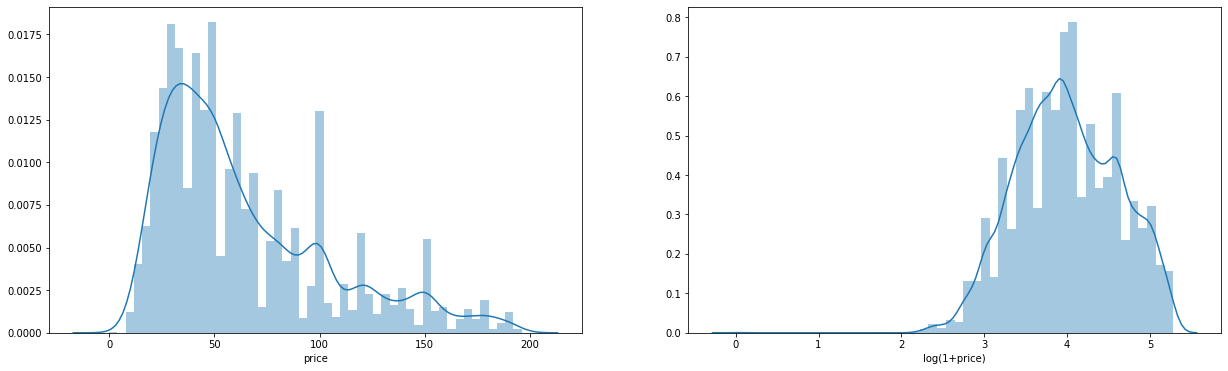

In [11]:
fig, axes = plt.subplots(1,2, figsize=(21,6))
sns.distplot(clean_sum_listings['price'], ax=axes[0])
sns.distplot(np.log1p(clean_sum_listings['price']), ax=axes[1])
axes[1].set_xlabel('log(1+price)')

Text(0, 0.5, 'count')

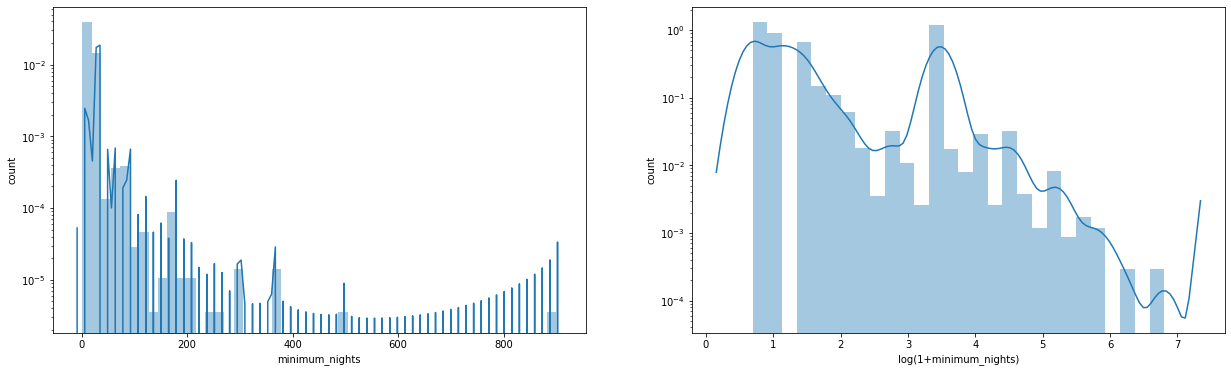

In [12]:
fig, axes = plt.subplots(1,2, figsize=(21, 6))

sns.distplot(clean_sum_listings['minimum_nights'], ax = axes[0])
axes[0].set_yscale('log')
axes[0].set_ylabel('count')

sns.distplot(np.log1p(clean_sum_listings['minimum_nights']),ax = axes[1])
axes[1].set_yscale('log')
axes[1].set_xlabel('log(1+minimum_nights)')
axes[1].set_ylabel('count')

In [13]:
clean_sum_listings['price'] = np.log1p(clean_sum_listings['price'])
clean_sum_listings['number_of_reviews'] = np.log1p(clean_sum_listings['number_of_reviews'])
clean_sum_listings['minimum_nights']= np.log1p(clean_sum_listings['minimum_nights'])
clean_sum_listings = clean_sum_listings.drop(['Unnamed: 0', 'host_id'], axis=1)

# try removing places with very little to no reviews 
# try to remove private bedrooms 

# data = clean_sum_listings.copy()
# print('amount of data original: ' + str(len(data)))
# data = clean_sum_listings[clean_sum_listings['reviews'] > 10] ### <<---  Change 10 for any other number to change the minimum number of reviews you require
# print('amount of data after removing "few reviews" properties: ' + str(len(data))

### 5. Baseline 

In [16]:
baseline = y_train.median() #median train
print(f'Baseline median value of an overnight stay in Barcelona: {str(baseline)}€')

Baseline median value of an overnight stay in Barcelona: 50.0€


In [17]:
baseline_error = np.sqrt(mean_squared_error(y_pred=np.ones_like(y_test) * baseline, y_true=y_test))
print(f'Baseline Mean Squared Error +- {str(round(baseline_error,2))}')

Baseline Mean Squared Error +- 43.68


### 6. Machine Learning Models

In [29]:
lr = LinearRegression()
alphas = [1000, 100, 50, 20, 10, 1, 0.1, 0.01]
l1_ratios = [0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9]
ridge = RidgeCV(alphas=alphas)
lasso = LassoCV(alphas=alphas, max_iter=10000)
elastic = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios)

In [168]:
# Function to calculate score with Cross-Validation

for model, name in zip([lr, ridge, lasso, elastic], ['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet']):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    mrse_train = np.sqrt(mean_squared_error(y_pred=y_pred_train, y_true=y_train))
    y_pred = model.predict(X_test)
    mrse_test = np.sqrt(mean_squared_error(y_pred=y_pred, y_true=y_test))
    best_alpha = ''
    
    if name != 'LinearRegression':
        best_alpha = ' best alpha: ' + str(model.alpha_)
    best_l1 = ''
    
    if name == 'ElasticNet':
        best_l1 = ' best l1: '+ str(model.l1_ratio_)
   
    print(name + ' mrse_train: ' + str(round(mrse_train,4)) + ', mrse_test: ' + str(round(mrse_test,4)) + best_alpha + best_l1)

LinearRegression mrse_train: 0.4676, mrse_test: 0.4749
Ridge mrse_train: 0.4679, mrse_test: 0.4743 best alpha: 10.0
Lasso mrse_train: 0.4852, mrse_test: 0.4905 best alpha: 0.01
ElasticNet mrse_train: 0.471, mrse_test: 0.4761 best alpha: 0.01 best l1: 0.001


In [22]:
# Ridge, Lasso and ElasticNet reveal much better MRSE than the baseline testing errors !
# Still very high values in the test set
# Problem is not it is not being able to generalise, problem is that it's not being able to learn

In [169]:
# Non-zero Lasso coefficients ordered by importance

order = np.argsort(np.abs(lasso.coef_))[::-1]
for i in order:
    coef_ = lasso.coef_[i]
    if coef_ > 0:
        print(X.columns[i] + ', ' + str(round(lasso.coef_[i],3)))

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

### Error Analysis

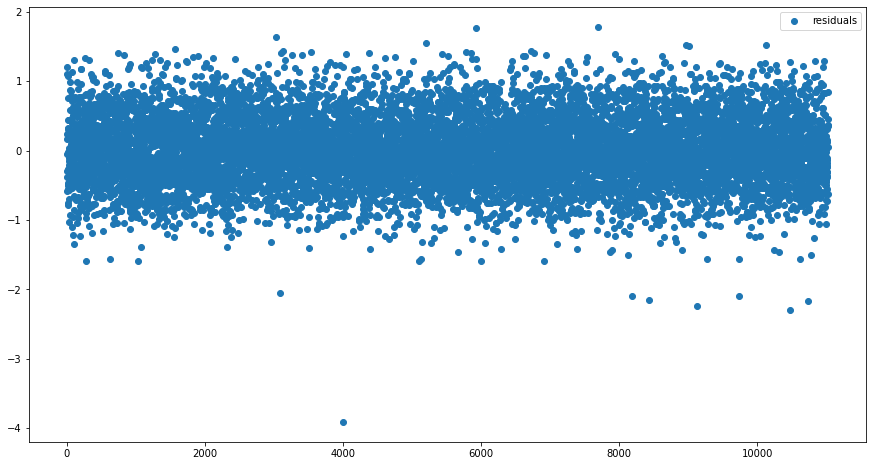

In [171]:
y_pred_train = lasso.predict(X_train)

diff = y_train - y_pred_train

plt.figure(figsize=(15,8))
plt.scatter(np.arange(len(diff)), diff, label = 'residuals')
plt.legend()